In [2]:
from scipy import optimize
import numpy as np
from lab3 import solar_bal, balance_set, balance_atmosphere, balance_earth
import matplotlib.pyplot as plt

In [3]:
root = optimize.newton(solar_bal, 254.81)
print(f"Temp in Kelvin: {root} \nTemp in Celcius: {root-273.15}")

Temp in Kelvin: 286.0166297820002 
Temp in Celcius: 12.866629782000246


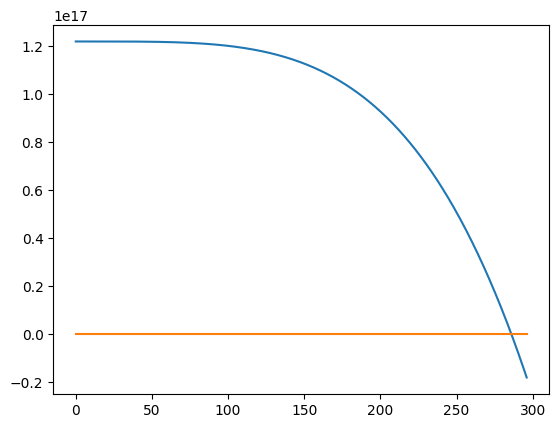

In [4]:
X = np.linspace(0, root+10, 1000)

plt.plot(X, solar_bal(X))
plt.plot(X, np.linspace(0, 0, 1000))

In [5]:
guess = [290, 290]
root = optimize.root(balance_set, guess) #method='hybr')
print(f"--Mean surface temp--\nTemp in Kelvin: {root.x[0]} \nTemp in Celcius: {root.x[0]-273.15}")
print("\n")
print(f"--Mean atmosphere temp--\nTemp in Kelvin: {root.x[1]} \nTemp in Celcius: {root.x[1]-273.15}")

--Mean surface temp--
Temp in Kelvin: 285.99203336825815 
Temp in Celcius: 12.842033368258171


--Mean atmosphere temp--
Temp in Kelvin: 248.5214790496416 
Temp in Celcius: -24.628520950358364


In [6]:
i = 1.0
def balance_set(vars):

    T_s, T_a = vars
    return [balance_earth(T_s, T_a, i), balance_atmosphere(T_s, T_a, i)]
    
    

In [7]:
temp_surf = []
temp_atm = []

X = np.linspace(0.6, 1.4, 50)

for iter in X:
    i = iter
    guess = [270, 270]
    root = optimize.root(balance_set, guess) #method='hybr')
    # print(f"S = {i}")
    print(f"--Mean surface temp--\nTemp in Kelvin: {root.x[0]} \nTemp in Celcius: {root.x[0]-273.15}")
    print(f"--Mean atmosphere temp--\nTemp in Kelvin: {root.x[1]} \nTemp in Celcius: {root.x[1]-273.15}")
    print("\n\n\n")

    temp_surf.append(root.x[0])
    temp_atm.append(root.x[1])

--Mean surface temp--
Temp in Kelvin: 214.10636845955634 
Temp in Celcius: -59.04363154044364
--Mean atmosphere temp--
Temp in Kelvin: 186.5461621963075 
Temp in Celcius: -86.60383780369247




--Mean surface temp--
Temp in Kelvin: 215.8757174238365 
Temp in Celcius: -57.27428257616347
--Mean atmosphere temp--
Temp in Kelvin: 187.772654515971 
Temp in Celcius: -85.37734548402898




--Mean surface temp--
Temp in Kelvin: 217.61345330794245 
Temp in Celcius: -55.53654669205753
--Mean atmosphere temp--
Temp in Kelvin: 188.9745792523353 
Temp in Celcius: -84.17542074766467




--Mean surface temp--
Temp in Kelvin: 219.32086395612825 
Temp in Celcius: -53.82913604387173
--Mean atmosphere temp--
Temp in Kelvin: 190.15304696368688 
Temp in Celcius: -82.9969530363131




--Mean surface temp--
Temp in Kelvin: 220.9991541942739 
Temp in Celcius: -52.15084580572608
--Mean atmosphere temp--
Temp in Kelvin: 191.30909174218002 
Temp in Celcius: -81.84090825781996




--Mean surface temp--
Temp in Ke

Text(0, 0.5, 'Mean temperature')

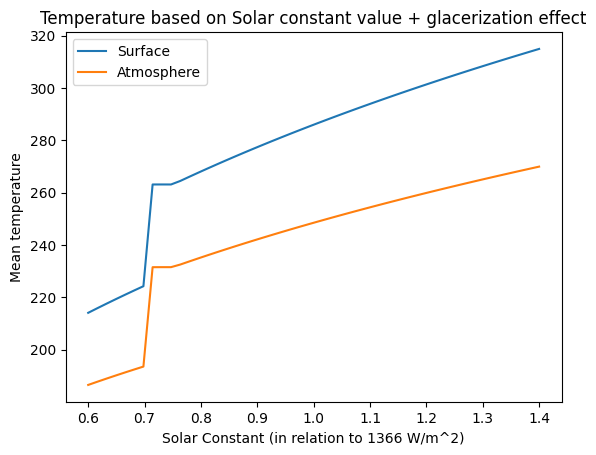

In [8]:
plt.plot(X, temp_surf)
plt.plot(X, temp_atm)
plt.legend(("Surface", "Atmosphere"))
plt.title("Temperature based on Solar constant value + glacerization effect")
plt.xlabel("Solar Constant (in relation to 1366 W/m^2)")
plt.ylabel("Mean temperature")